### Classification of hypothroid diseases with balanced training data.¶ 
There are 4 classes of samples in the data set, labeled as  {'negative': 0,   'primary hypothyroid': 1, 'compensated hypothyroid': 2,   'secondary hypothyroid': 3 } .   There only two instances of class 3.  The porject was mainly focus on class 1 and 2 classification.  

The data set contains 92. 1% negative instances (2580) and 7.9% disease instances (220). Therefore, the trained model on the original data set would attemp to fit the negative majority.  This may lead to the underperformance of the disease prediction (class 1 and 2). 

I separated each classes of data, then combined randomly selected 436 class 0 instances with all class 1 and 2 instances (218) at 2: 1 ratio.  The data set is much more balanced, sightly bias toward class 0 to reflect the bias in the original data set.  There are only 2 instances of class 3 , not further analysed here.   

Finally, I compared the model trained with the unbalanced and balanced data sets in test data prediction.  The  model trained with the balanced data set has 0.06 improvement in weighted average f1-score of class 1 and 2.

Data set:  http://archive.ics.uci.edu/ml/datasets/thyroid+disease
"allhypo.data" was used in the analysis, and "allhypo.names" for column names.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### The data was already cleaned and scaled in hypothyroid_data_processing.ipynb 
df=pd.read_csv('hypodata_clean_scaled.csv')

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,classes
0,-0.530085,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.165852,0.647720,0.465593,0.773057,-5.748624e-02,3,0
1,-1.409958,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.028139,-0.034052,-0.206738,0.000428,4.593057e-07,0,0
2,-0.285676,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.181591,0.000037,-0.002116,-0.478385,2.961791e-01,0,0
3,0.887488,0.0,1,0,0,0,0,0,0,0,...,0,0,0,-0.221921,-0.170406,1.927181,0.000428,4.593057e-07,0,0
4,0.887488,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.194378,-1.124887,-1.405240,-0.696027,-1.311391e+00,1,0


In [4]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral source', 'classes'],
      dtype='object')

In [5]:
# Get dataframe for class 0 samples. 
df0 = df[df['classes']==0]

In [6]:
# Get dataframe for class 1 samples. 
df1 = df[df['classes']==1]

In [7]:
# Get dataframe for class 2 samples. 
df2 = df[df['classes']==2]

In [8]:
# Get dataframe for class 3 samples. 
df3 = df[df['classes']==3]

In [9]:
# The first number in tuple is sample number.
df0.shape

(2580, 23)

In [10]:
df1.shape

(64, 23)

In [11]:
df2.shape

(154, 23)

In [12]:
df3.shape
### Only 2 samples for class 3, would not be analysed further. 

(2, 23)

#### Total sample number of class1 and 2 is 218.

In [13]:
from sklearn.utils import shuffle

In [14]:
shuffle(df0).head()
# random shuffle class 0 data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,classes
391,-0.432321,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.121587,0.375011,-0.645214,-0.369564,-5.397572e-01,0,0
1343,0.056497,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.000007,0.000037,-0.000011,0.000428,4.593057e-07,0,0
1464,-1.067785,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.030880,0.102302,-0.499056,0.283362,-7.326656e-01,0,0
705,-0.432321,0.0,1,0,0,0,0,0,0,0,...,0,0,0,-0.184542,0.375011,-0.469824,-0.750438,-8.963763e-02,3,0
1199,0.545315,0.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.196838,-0.306761,-0.060579,-0.804848,4.890875e-01,0,0


In [15]:
df0_ran_shu = shuffle(df0).iloc[0:436]
# pick 436 class 0 data (2X (class1+class2)sample No.)

In [16]:
df_merg = pd.concat([df1, df2, df0_ran_shu])
# merge class 0, 1 and 2 data

In [17]:
df_merg.shape

(654, 23)

In [18]:
X=df_merg[['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI']]

In [19]:
y=df_merg['classes']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_tem, y_train, y_tem = train_test_split(X, y, test_size=0.6, random_state=101)

In [22]:
X_cv, X_test, y_cv, y_test = train_test_split(X_tem, y_tem, test_size=0.5, random_state=101)

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
clf_nn1 = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [26]:
clf_nn2 = MLPClassifier(solver='lbfgs', alpha=0.003, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [27]:
clf_nn3 = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [28]:
clf_nn4 = MLPClassifier(solver='lbfgs', alpha=0.03, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [29]:
clf_nn5 = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [30]:
clf_nn6 = MLPClassifier(solver='lbfgs', alpha=0.3, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [31]:
clf_nn7 = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [32]:
clf_nn8 = MLPClassifier(solver='lbfgs', alpha=8, hidden_layer_sizes=(8,8), max_iter=200).fit(X_train, y_train)

In [33]:
clf_nn9 = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [34]:
clf_nn10 = MLPClassifier(solver='lbfgs', alpha=0.003, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [35]:
clf_nn11 = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [36]:
clf_nn12 = MLPClassifier(solver='lbfgs', alpha=0.03, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [37]:
clf_nn13 = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [38]:
clf_nn14 = MLPClassifier(solver='lbfgs', alpha=0.3, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [39]:
clf_nn15 = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [40]:
clf_nn16 = MLPClassifier(solver='lbfgs', alpha=3, hidden_layer_sizes=(12,8), max_iter=200).fit(X_train, y_train)

In [41]:
nn_lst = [clf_nn1, clf_nn2, clf_nn3, clf_nn4, clf_nn5, clf_nn6, clf_nn7, clf_nn8, clf_nn9, clf_nn10, clf_nn11, 
          clf_nn12, clf_nn13, clf_nn14, clf_nn15, clf_nn16]

In [42]:
for i in range(len(nn_lst)):
    print("Neural Network model ", i+1, 
          "\nClassification report on trainng data\n", classification_report(y_train, nn_lst[i].predict(X_train)))
    print("Classification report on cross-validation data\n", classification_report(y_cv, nn_lst[i].predict(X_cv)))

Neural Network model  1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       184
          1       1.00      0.96      0.98        24
          2       0.98      1.00      0.99        53

avg / total       1.00      1.00      1.00       261

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.98      0.97      0.97       122
          1       0.95      0.84      0.89        25
          2       0.85      0.92      0.88        49

avg / total       0.94      0.94      0.94       196

Neural Network model  2 
Classification report on trainng data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       184
          1       0.96      0.96      0.96        24
          2       0.98      0.98      0.98        53

avg / total       0.99      0.99      0.99       261

Classification repor

#### roc_auc_score is not supported by sklearn.  I used f1-scores for the model evaluation.  Overall, all models performed similarily. Model nn7  performed better than the others, based on high class 1, class 2 and overall overall f1-score

In [45]:
## obtain model weights. 
W0_7 = clf_nn3.coefs_[0]

In [46]:
W1_7 = clf_nn3.coefs_[1]

In [47]:
W2_7 = clf_nn3.coefs_[2]

In [48]:
# Save the weights, which can be used to reconstruct the model in different environments. 
np.savetxt('neural_network weight0_balan_data_training.csv', W0_7, delimiter=',')

In [49]:
np.savetxt('neural_network weight1_balan_data_training.csv', W1_7, delimiter=',')

In [50]:
np.savetxt('neural_network weight2_balan_data_training.csv', W2_7, delimiter=',')

In [51]:
### The function exports classification reports as pd DataFrame files. 
def export_classification_report(report_in):
    rep = report_in.split('\n')
    column_names = ['class']
    report_out =[]
    for i in rep[0].split():
        column_names.append(i)
    for row in rep[2:6]:
        report_out.append(row.split())
    if rep[6]!='':
        report_out.append(rep[6].split('      '))
    elif rep[6]=='' and rep[7]!='':
        report_out.append(rep[7].split('      '))
        
    report_df = pd.DataFrame(report_out)
    report_df.columns = column_names
    return report_df 

### The following function calculates weighted average f1-scores of class 1 and class 2.  
def f1_score_class_1_2(df, i=1):
    return (df.loc[i,"f1-score"]*df.loc[i,"support"]+df.loc[i+1,"f1-score"]*df.loc[i+1,"support"])/(df.loc[i,"support"]+df.loc[i+1,"support"])  

In [52]:
# Classification reports were exported as csv files.  
export_classification_report(classification_report(y_cv, clf_nn7.predict(X_cv))).to_csv("Neural_network clf_nn7 classifi_report_cv_data_bal.csv", index=False)

In [84]:
# the csv file was reopened by pandas as pd DataFrame, that automatically converted numbers in the classification 
# report from string data type to int and float data type.
nn7_cv = pd.read_csv("Neural_network clf_nn7 classifi_report_cv_data_bal.csv")
### The best model

In [85]:
nn7_cv

,class,precision,recall,f1-score,support
0,0,0.97,0.98,0.98,122.0
1,1,0.96,0.96,0.96,25.0
2,2,0.94,0.90,0.92,49.0
3,NaN,NaN,NaN,NaN,NaN
4,avg / total,0.96,0.96,0.96,196.0


In [86]:
f1_score_class_1_2(nn7_cv, i=1)
### Model_nn7's average f1-score for class 1 and 2 for the cross-validation data.  

0.93351351351351364

In [87]:
export_classification_report(classification_report(y_test, clf_nn7.predict(X_test))).to_csv("Neural network classification report on test data_bal_training_data.csv", index=False)

In [88]:
print(classification_report(y_test, clf_nn7.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       130
          1       1.00      0.73      0.85        15
          2       0.92      0.94      0.93        52

avg / total       0.96      0.96      0.96       197



In [89]:
### Export nn7 classification report
export_classification_report(classification_report(y_test, clf_nn7.predict(X_test))).to_csv("Neural_network clf_nn7 classifi_report_test_data_bal_training.csv", index=False)

In [90]:
nn7_test = pd.read_csv("Neural_network clf_nn7 classifi_report_test_data_bal_training.csv")

In [91]:
nn7_test

,class,precision,recall,f1-score,support
0,0,0.97,0.99,0.98,130.0
1,1,1.00,0.73,0.85,15.0
2,2,0.92,0.94,0.93,52.0
3,NaN,NaN,NaN,NaN,NaN
4,avg / total,0.96,0.96,0.96,197.0


In [92]:
f1_score_class_1_2(nn7_test, i=1)
### nn7 average f1-scores of class1/2 on test data.  

0.91208955223880595

In [93]:
from sklearn.externals import joblib

In [94]:
### Export model.  
joblib.dump(clf_nn7, 'neural_network_model_nn7_balanc_training data.pkl')

['neural_network_model_nn7_balanc_training data.pkl']

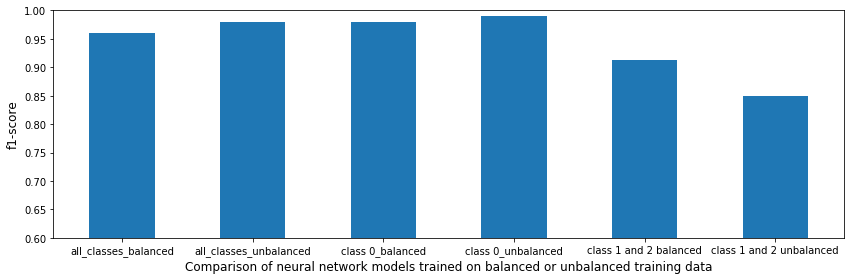

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
x_lst = ['all_classes_unbalanced', 'class 1 and 2 unbalanced', 'all_classes_balanced', 'class 1 and 2 balanced',
        'class 0_unbalanced', 'class 0_balanced']
h_val = [0.98, 0.849, 0.96, 0.912, 0.99, 0.98]
ax.bar(x_lst, h_val, width=0.5)
ax.set_ylim((0.6, 1))
ax.set_xlabel('Comparison of neural network models trained on balanced or unbalanced training data', fontsize=12)
ax.set_ylabel('f1-score', fontsize=12)
plt.tight_layout()
plt.savefig("hypothroid classification f1-scores.png", dpi=300)

#### The weighted average f1-score of class 1 and 2 is about 0.06 better with the model trained with the balanced data than the one trained with unbalanced data.  The average f1-scores of all classes and class 0 is slightly better with the model trained with unbalanced data, consistent with the model tried to fit class 0 instances which are vast majority in the data set.   

#### For the disease prediction, the weighted average f1-score for class 1 and 2 is more impotant.  Using balanced training data improved the prediction of the model.  